In [23]:
## Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [24]:
# importing the data from csv file
df = pd.read_csv('exercise.csv')

In [25]:
# Top 5 values of data set using df.head()
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


### Dataset information

- User_ID : User Id of person
- Gender : Male or Female . Categorical variable
- Age : Age of person .Continuous variable
- Height : Height of person .Continuous variable
- Weight : Weight of person . Continuous variable
- Duration : Duration of Workout . Continuous variable
- Heart_rate : Heart rate during Workout . Contiuous Variable
- Body_Temp : Body Temp during Workout . Continuous Variable
- Calories : Calries burnt during workout . The Target variable to predict. Contituous variable

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [26]:
# To check no of rows and column in data set
df.shape

(15000, 9)

In [27]:
# To check for missing values in data set
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There are no missing values in data set.

In [28]:
# To check for duplicates in data set
df.duplicated().sum()

np.int64(0)

No duplicates value found in data set

In [29]:
# Checking the number of missing value present
df.nunique()

User_ID       15000
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
Calories        277
dtype: int64

### Exploring Data

In [30]:
print(f"Categories in 'Gender' variable : {df['Gender'].unique()}")

Categories in 'Gender' variable : ['male' 'female']


In [31]:
# We define numerical and Categorical variable
numerical_variable = [feat for feat in df.columns if df[feat].dtype != 'O']
categorical_variable = [feat for feat in df.columns if df[feat].dtype == 'O']
print(f"Numerical variable : {numerical_variable}")
print(f"Categorical variable : {categorical_variable}")

Numerical variable : ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
Categorical variable : ['Gender']


C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\3804340496.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df['Calories'],bins = 30,kde = True, palette='Set2',stat = 'density')


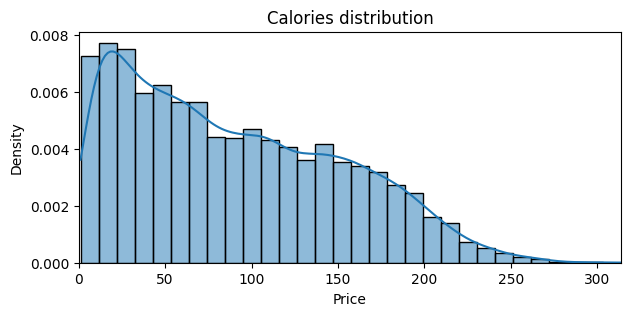

In [32]:
# Calories distribution
plt.figure(figsize = (7,3))
sns.histplot(data = df['Calories'],bins = 30,kde = True, palette='Set2',stat = 'density')
plt.title('Calories distribution')
plt.xlim(0, df['Calories'].max())
plt.xlabel('Price')
plt.show()

The distribution of our target column seems to be left skewed

C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\1427488418.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins = 30,kde = True, palette='Set2',stat = 'density')
C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\1427488418.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins = 30,kde = True, palette='Set2',stat = 'density')
C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\1427488418.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins = 30,kde = True, palette='Set2',stat = 'density')
C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\1427488418.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins = 30,kde = True, palette='Set2',stat = 'density')
C:\Users\NIKHIL PALIWAL\AppData\Local\Temp\ipykernel_15416\1427488418.py:8: 

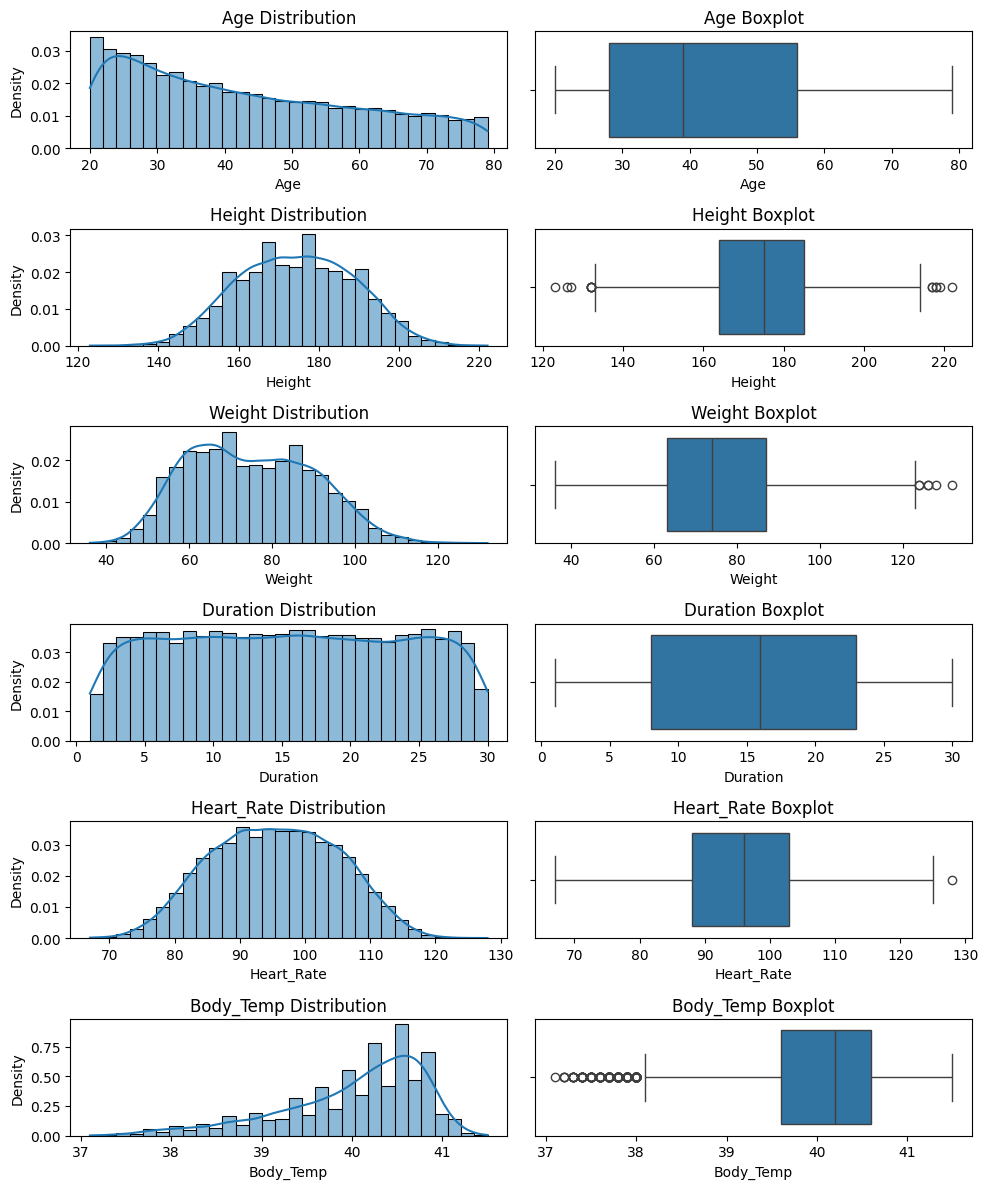

In [33]:
# Age distribution
numerical_list = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

plt.figure(figsize=(10, 2 * len(numerical_list)))

for i, col in enumerate(numerical_list, 1):
    plt.subplot(len(numerical_list), 2, 2*i - 1)
    sns.histplot(df[col],bins = 30,kde = True, palette='Set2',stat = 'density')
    plt.title(f'{col} Distribution')

    plt.subplot(len(numerical_list), 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

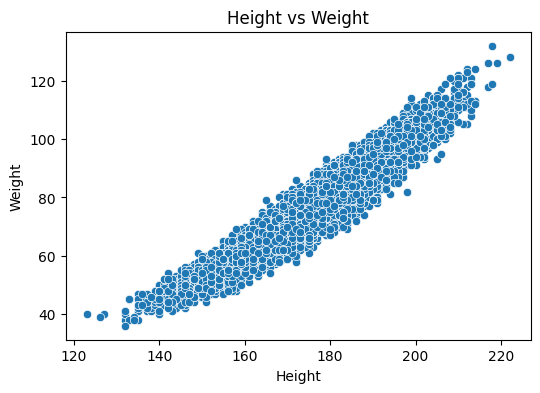

In [34]:
# Scatter plot Height vs Weight
plt.figure(figsize=(6,4))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()


Height and weight are correlated. As Height increases weight also increases

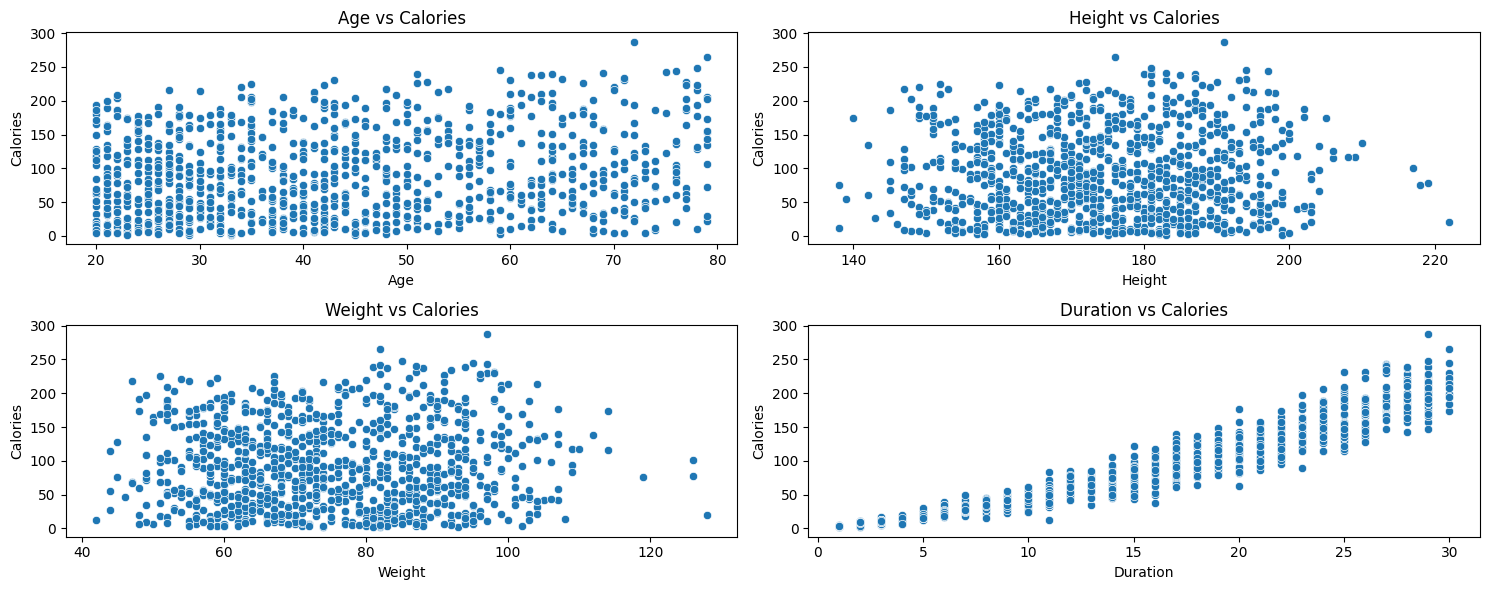

In [35]:
features = ['Age', 'Height', 'Weight', 'Duration']

sample_df = df.sample(1000, random_state=42)

plt.figure(figsize=(15, 6))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=col, y='Calories', data=sample_df)
    plt.title(f'{col} vs Calories')

plt.tight_layout()
plt.show()


As Expected the higher the duration of workout higher will be calories burnt.

But there is no relationship between Age, Height, Weight and calories burnt.

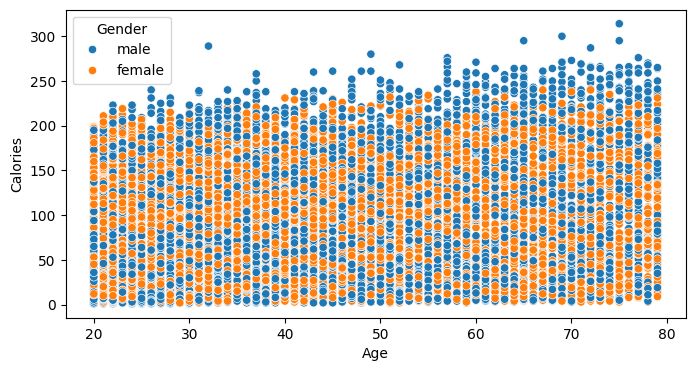

In [36]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'Age',y = 'Calories',hue = 'Gender',data = df)
plt.show()

In [37]:
df.groupby('Gender').mean('Height')['Calories']

Gender
female    88.153052
male      90.945750
Name: Calories, dtype: float64

Avergae height of boys is heigher than girls.

In [38]:
df.groupby("Gender").mean('Weight')['Calories']

Gender
female    88.153052
male      90.945750
Name: Calories, dtype: float64

Average weight of girls is less than boys.

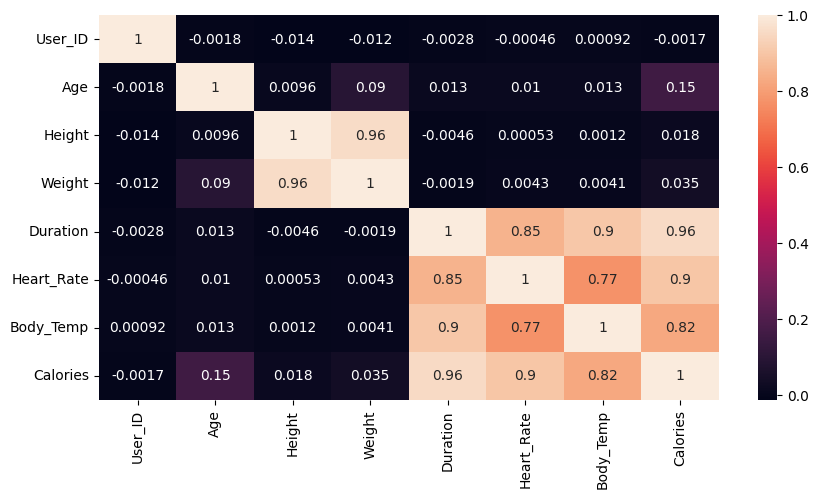

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only= True) ,
           annot=True,
           cbar=True)
plt.show()

Duration have 0.9 correlation with Calories, Heart rate have 0.9 correlation with Calories, body temp have 0.825 correlation with Calories.

Duration is high correlated with Heart rate (0.85) ,Body Temp (0.9) and Calories (0.96)

Longer exercise leads to a higher heart rate, which increases body temperature and ultimately burns more calories.

Height and Weight have 0.96 correlation. Multicollinearity increase. We need to drop one of this feature in Feature engineering.